# 테일러 급수 미분

**테일러 급수란?**

테일러 급수는 함수를 무한히 미분하여 얻은 도함수 값을 이용하여 함수를 근사하는 방법입니다.

테일러 급수는 다음과 같이 정의됩니다.

$$f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots$$

작가는 sin 함수의 미분을 예로 들어 테일러 급수를 설명하고 있습니다.

$y=sin(x)$ 일 때 그 미분은 $\frac{dy}{dx}=cos(x)$ 입니다.

In [3]:
import numpy as np
from framework import Function as F

class Sin(F):
  def forward(self, x):
    y = np.sin(x)
    return y
  
  def backward(self, gy):
    x = self.inputs[0].data
    gx = gy * np.cos(x)
    return gx
  
def sin(x):
  return Sin()(x)

In [4]:
from framework import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
0.7071067811865476


y값과 x값 미분 모두 0.7.... 이다. 1 / np.sqrt(2) 와 거의 일치한다. $1/\sqrt{2}$. $$\sin(\pi/4) = \cos(\pi/4) = 1/\sqrt{2}$$

## 27.2 테일러 급수 이론

테일러 급수를 이용한 $sin$의 미분을 구합니다. 테일러 급수는 어떤 함수를 다항식으로 근사하는 방법이다.

$$f(x) = f(a) + f'(a)(x-a) + \frac{1}{2!}f''(a)(x-a)^2 + \frac{1}{3!}f'''(a)(x-a)^3 + \cdots$$

이것이 점 a에서 f(x)의 테일러 급수다. a는 임의의 값이고, f(a)는 점 a에서 f(x)의 값이다. f'는 1차미분, f''는 2차 미분, f'''는 3차 미분이다. !기호는 계승을 뜻하며 n!, 즉 n계승은 1부터 n까지의 정수를 모두 곱한 것이다. 5! = 5x4x3x2x1 = 120이다.

테이러 급수에의해 f(x)는 점 a를 기점으로 x에 대한 다항식으로 근사할 수 있다. 이것이 테일러 급수다.

a=0일 때 테일러 급수는 `매클로린 전개`라고 한다. 매클로린 전개는 테일러 급수의 특수한 경우다.

$$f(x) = f(0) + f'(0)x + \frac{1}{2!}f''(0)x^2 + \frac{1}{3!}f'''(0)x^3 + \cdots$$

f(x) = sin(x)일 때 테일러 급수는 다음과 같다. 그러면 f'(x)는 cos(x), f''(x)는 -sin(x), f'''(x)는 -cos(x), f''''(x)는 sin(x)다. 이것을 테일러 급수에 대입하면 다음과 같다.

$$\sin(x) = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots \sum^\infty_{n=0} \frac{x^{2n+1}}{(2n+1)!}$$

sin함수는 거듭제곱으로 이루어진 항들이 무한히 계속되는 형태로 표현된다. 여기서 중요한점은 $\sum$의 n이 커질수록 근사 정밀도가 좋아진다. 또한 n이 커질수록 $(-1)^n\frac{x^{2n+1}}{(2n+1)!}$의 절대값은 작아지므로, 이 값을 참고하여 n 값을 적절히 결정할 수 있다.

### 27.3 테일러 급수 구현

$$
\sin(x) = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots \sum^\infty_{n=0} \frac{x^{2n+1}}{(2n+1)!}
$$

식을 파이썬으로 구현한다.

In [5]:
def my_sin(x, threshold=1e-4):
  y = 0
  for i in range(100000):
    c = (-1)**i / np.math.factorial(2*i+1)
    t = c * x**(2*i+1)
    y = y + t
    if np.abs(t.data) < threshold:
      break
  return y

이와 같이 for문 안에서 n번째에 추가할 항목을 t로 하여 구현했다. 이 때 임계값을 threshold로 하여, t의 절대값이 threshold보다 낮아지면 for문을 종료하도록 했다. 이렇게 하면 n이 커질수록 근사 정밀도가 높아진다.

In [6]:
import numpy as np
from framework import Variable

x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


/tmp/ipykernel_377271/2261274213.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  c = (-1)**i / np.math.factorial(2*i+1)


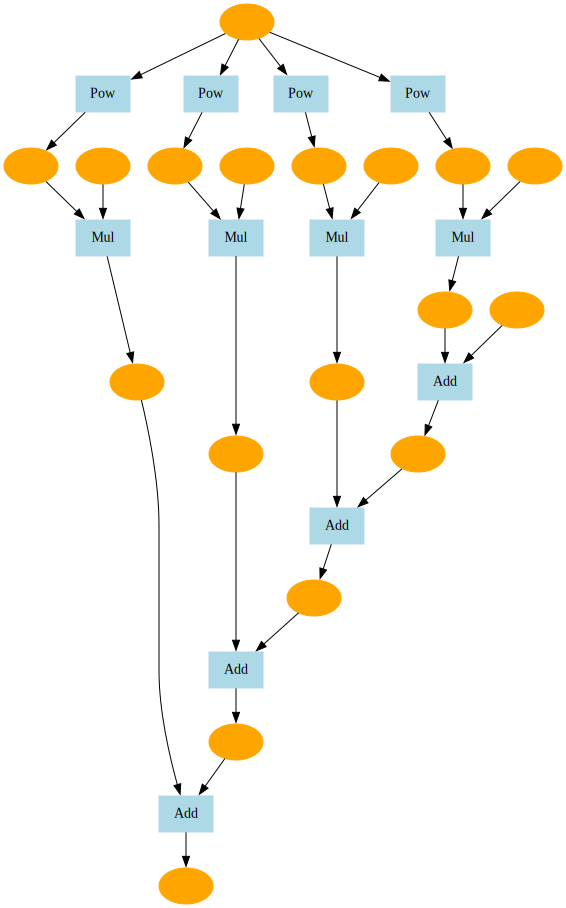

In [7]:
import graphviz
from framework import get_dot_graph
graphviz.Source(get_dot_graph(y, verbose=False))

0.7071067811865475
1.4142099960093932


/tmp/ipykernel_377271/2261274213.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  c = (-1)**i / np.math.factorial(2*i+1)


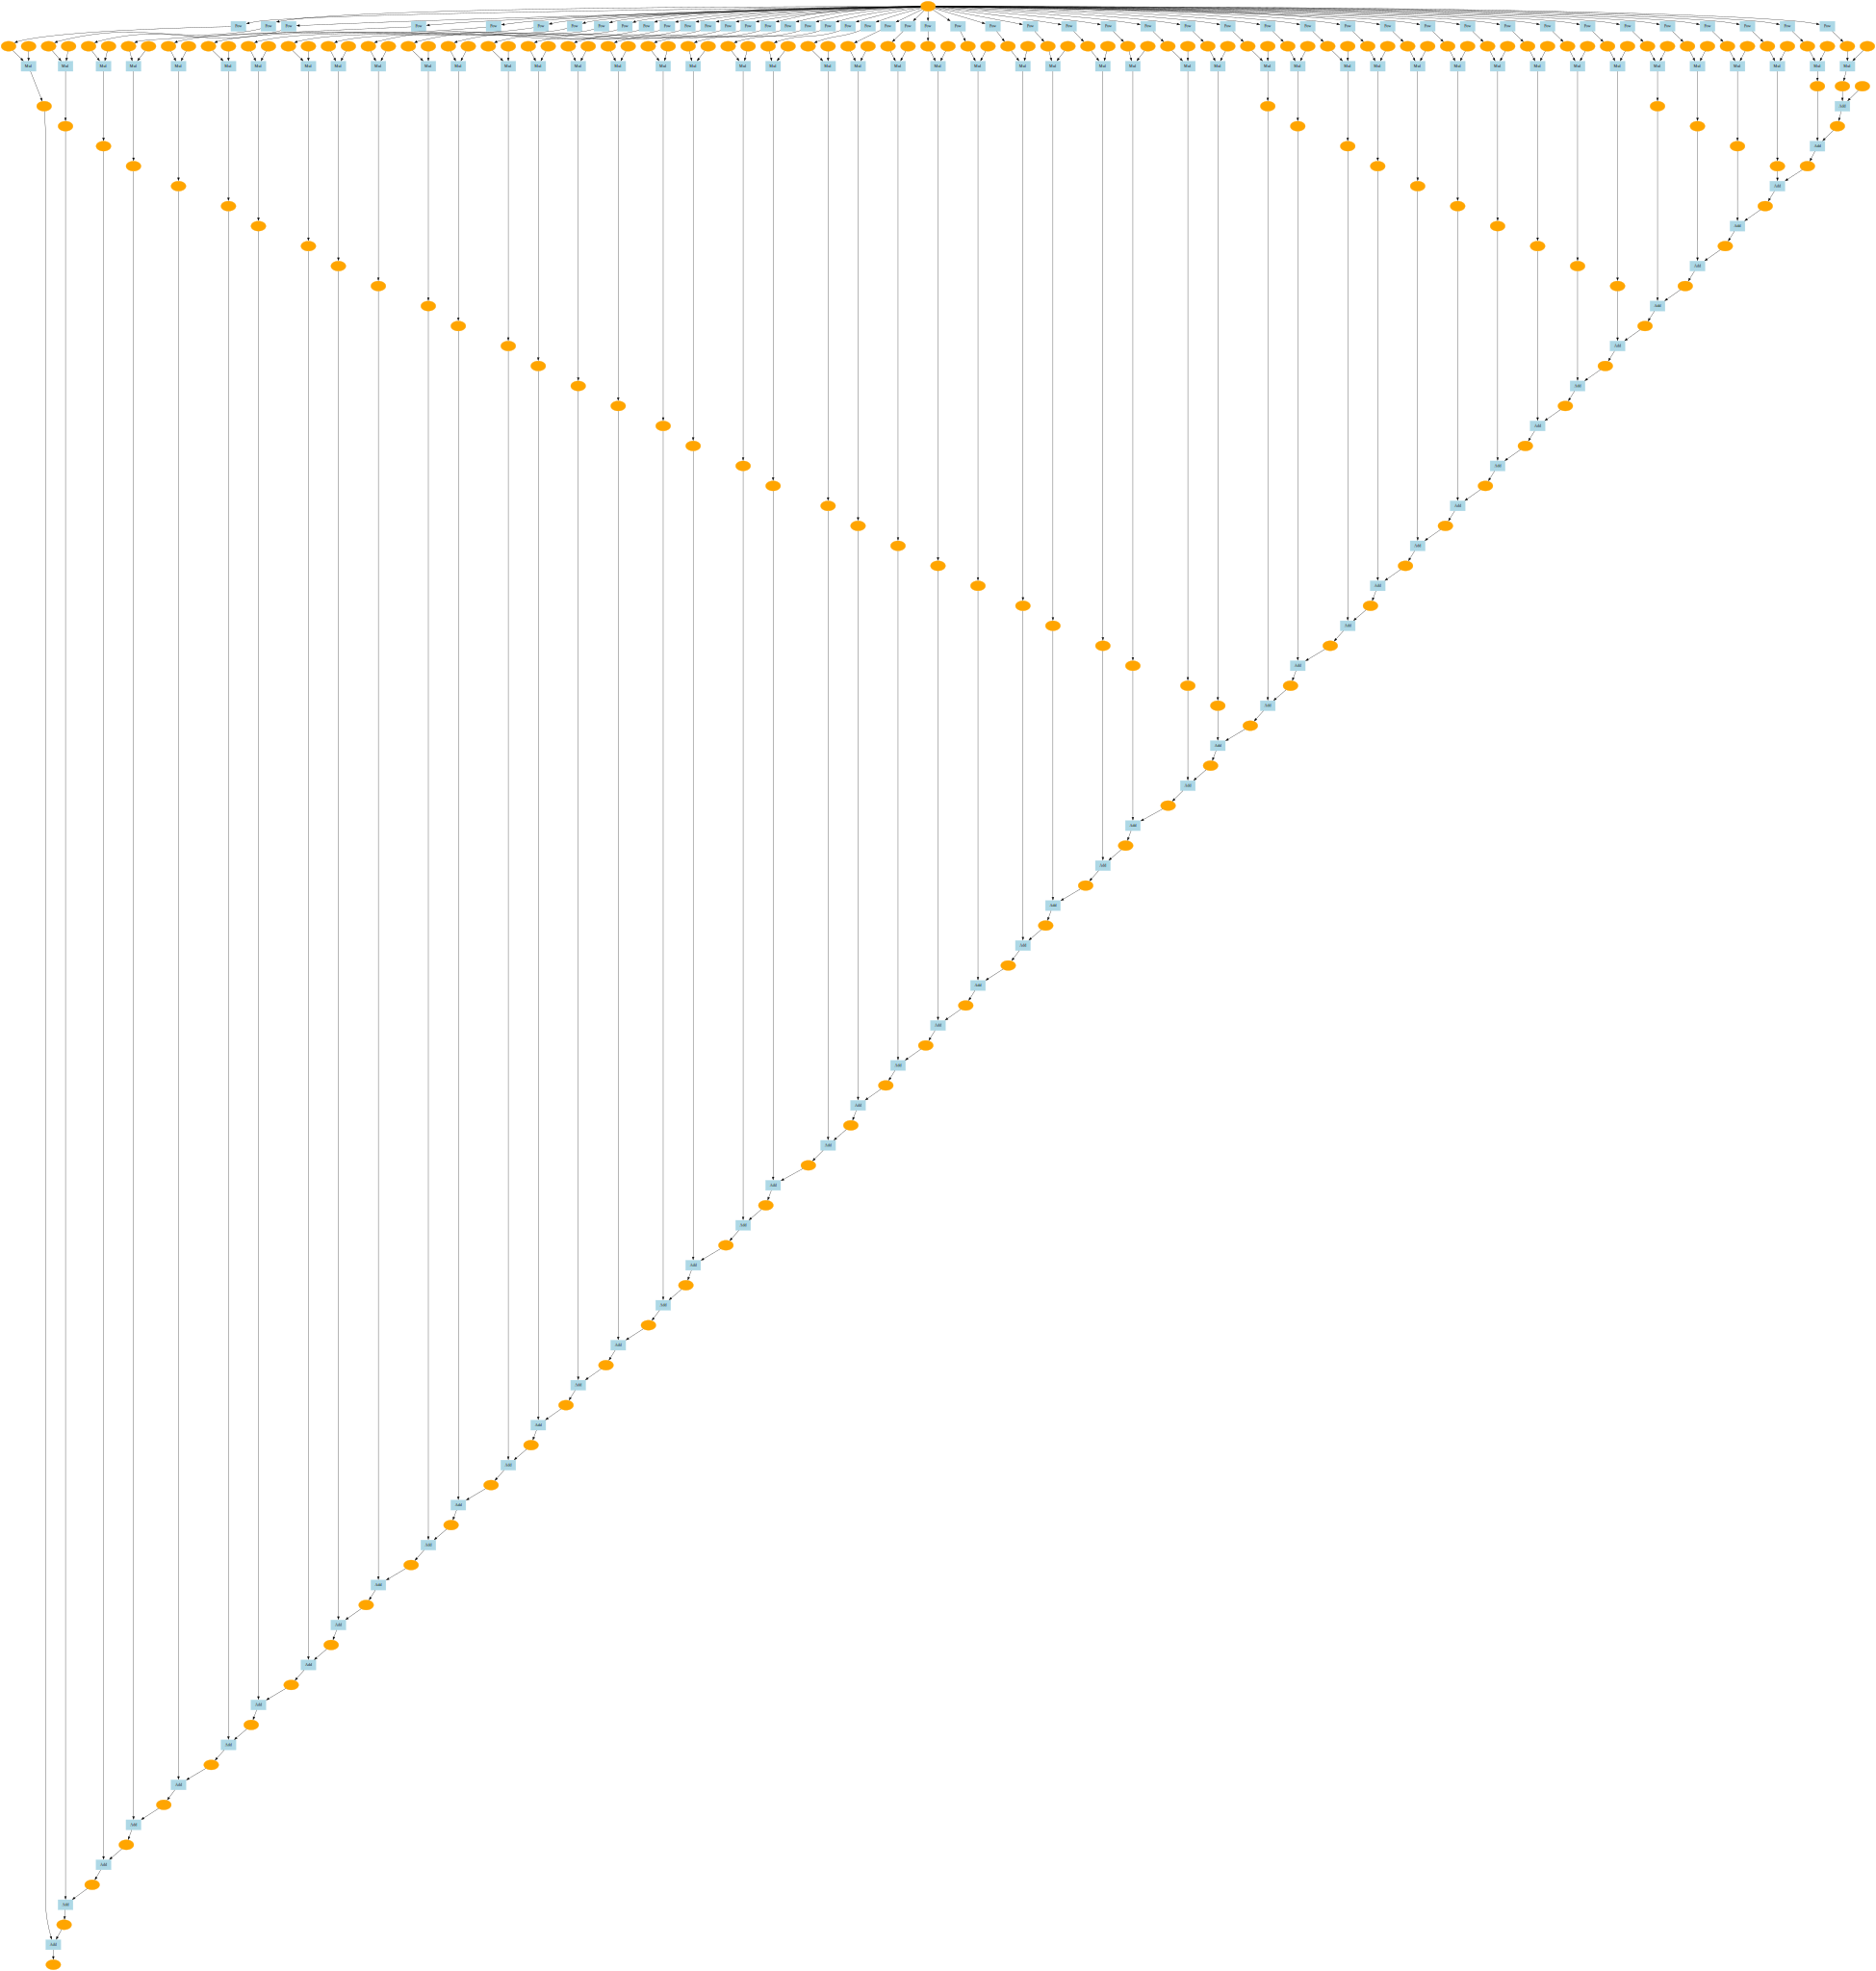

In [8]:
y = my_sin(x, threshold=1e-150)
y.backward()
print(y.data)
print(x.grad)

import graphviz
from framework import get_dot_graph
graphviz.Source(get_dot_graph(y, verbose=False))